**第二章 感知机**  
代码测试

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [4]:
#加载数据
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names) #df的列为iris数据集的feature_names
df['label'] = iris.target #用iris数据集的target作为数据添加一列’label‘

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label'] #修改列名称
df.label.value_counts() #统计label列的数据（多少个0、1、2）

2    50
1    50
0    50
Name: label, dtype: int64

In [7]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


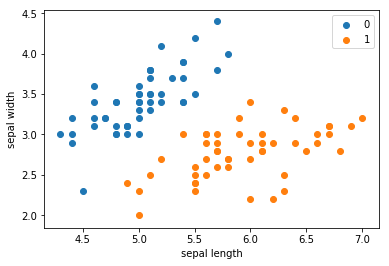

In [8]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend() #显示label图例


In [9]:
data = np.array(df.iloc[:100,[0,1,-1]]) 
#创建数组，切片选择df中的前100行，第0、1列和最后一列

In [10]:
X,y = data[:,:-1],data[:,-1]
#X是每一行的除最后一列前面的各列
#y是每一行的最后一列，此时y为0和1

In [11]:
y = np.array([1 if i==1 else -1 for i in y]) #将y值改为-1和1

In [12]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1,dtype=np.float32) 
        #创建元素均为1的数组，一行，长度为len(data[0])-1，dtype数据类型
        #data[0]为第一行
        self.b = 0
        self.l_rate = 0.1 #步长，学习率learning rate
    
    def sign(self,x,w,b):# 一元一次线性方程
        y = np.dot(x,w)+b #dot()返回的是两个数组的点积(dot product)
        return y
    
    #随机梯度下降法
    def fit(self,X_train,y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X,self.w,self.b) <= 0: # y和sigh函数的正负不一致,出现误分类数据
                    self.w = self.w + self.l_rate*np.dot(y,X)
                    self.b = self.b + self.l_rate*y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'
    
    def score(self):
        pass

In [13]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

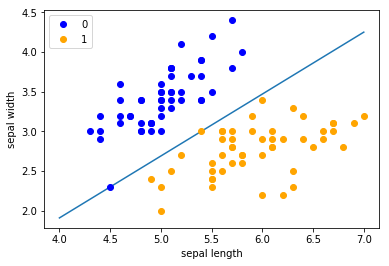

In [14]:
x_points = np.linspace(4,7,10) #生成一个4到7的等差数列
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]

plt.plot(x_points,y_) # 生成一条直线

plt.plot(data[:50,0],data[:50,1],'bo',color='blue',label='0')
plt.plot(data[50:100,0],data[50:100,1],'bo',color='orange',label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**scikit-learn Perceptron**

In [21]:
from sklearn.linear_model import Perceptron

In [22]:
clf = Perceptron(fit_intercept=False,max_iter=1000,shuffle=False)
clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=False,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=False, tol=None, verbose=0, warm_start=False)

In [18]:
print(clf.coef_)

[[  74.6 -127.2]]


In [19]:
print(clf.intercept_)

[0.]


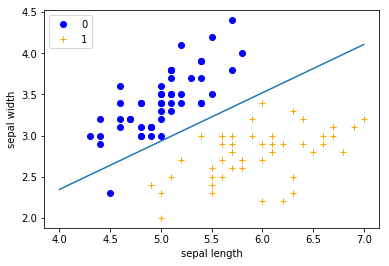

In [27]:
x_points = np.arange(4,8) #生成4-8的等差数组（不包括8）
y_ = -(clf.coef_[0][0]*x_points + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_points,y_)

plt.plot(data[:50,0],data[:50,1],'o',color='blue',label='0') # plot x and y using blue circle markers
plt.plot(data[50:100,0],data[50:100,1],'r+',color='orange',label='1') # with red plusses

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()